<a href="https://colab.research.google.com/github/marciogsantana/Engenharia-de-dados/blob/main/kmens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importação das bibliotecas


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#analizando dataset

In [ ]:
base_vendas = pd.read_csv('/content/Mall_Customers.csv')  # importando dataset
base_vendas.head() # visualizando cabeçalho


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=04997199e88965156028c3557eceb3801035befcdc93bc7157e26d8c24047c64
  Stored in directory: /tmp/pip-ephem-wheel-cache-jkolo2re/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
from pandas_profiling import profile_report

In [ ]:
profile = profile_report(base_vendas, title='Relatorio - Pandas profiling', html={'style':{'full_width':True}})

<function matplotlib.pyplot.show>

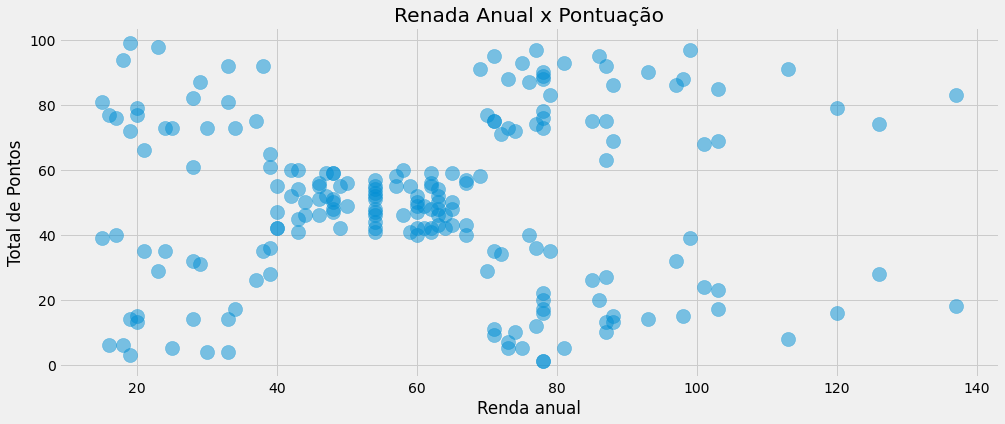

In [ ]:
plt.style.use('fivethirtyeight')  # stilo do grafico
plt.figure(1, figsize=[15,6])  # tamanho
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = base_vendas, s= 200, alpha= 0.5) # x e y = nome da coluna 
plt.title('Renada Anual x Pontuação') # titulo
plt.xlabel('Renda anual'), plt.ylabel('Total de Pontos') # labels x e y
plt.show

<function matplotlib.pyplot.show>

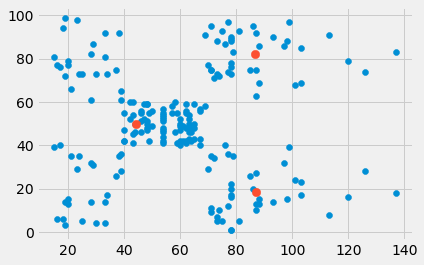

In [ ]:
x2 = base_vendas[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values # garantir que seja carregado apenas valores
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init=10)  
pred_y = kmeans.fit_predict(x2)
plt.scatter(x2[:,0], x2[:,1])
plt.grid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70)
plt.show

#metodo do cotovelo para identificar o numero de cluster ideal pega o ponto mais distante da curva , ponto onde a linha começa a ficar estavel

Text(0, 0.5, 'wcss')

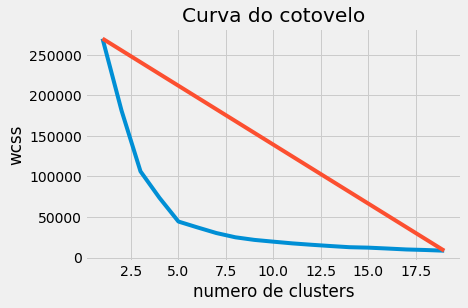

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init=10)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1,19], [wcss[0], wcss[len(wcss)-1]])
plt.title('Curva do cotovelo')
plt.xlabel('numero de clusters')
plt.ylabel('wcss')

# de acordo com o metodo o numero ideal de cluster é 5

[[26.30434783 20.91304348]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]
44448.45544793371


<function matplotlib.pyplot.show>

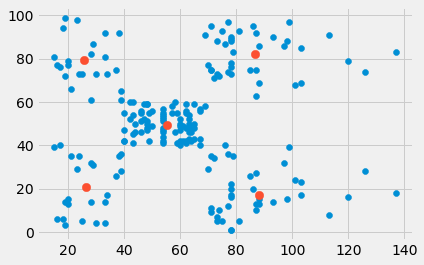

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter= 300, n_init=10)  
pred_y = kmeans.fit_predict(x2)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
plt.scatter(x2[:,0], x2[:,1])
plt.grid
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70)
plt.show